<a href="https://colab.research.google.com/github/Samarth1410/Samarth_FMML/blob/main/Linear_Classification_Project_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab-6 Project
## Linear Classification 
### Project Coordinatior: Shantanu Agrawal

<br><br>
**NOTES:**
- In this project, we will try to implement the perceptron linear classification involving the perceptron update and classification methods.
- Implementation needs be done for code cells starting **Task #x**.
- Try to write modular code such that it can be reused and will minimize duplication.

In [ ]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

Creating the dataset for this exercise

In [ ]:
X, y, p = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05, return_centers=True)
print(p)

[[-8.71065643 -0.30398802]
 [-1.25552658 -5.7708015 ]]


**NOTE:** Above dataset is not in augmented form, bias term have not been added initially to the dataset. Hence, you have to preprocess the data or make the necessary changes in the algorithm.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

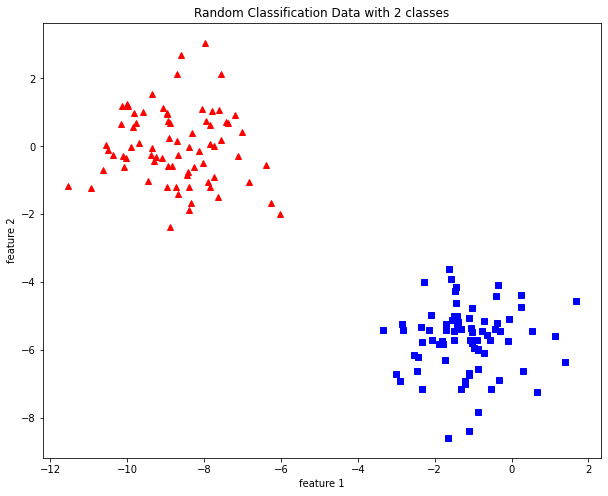

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^') # Negative samples
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs') # Positive samples
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Try to revise the perceptron algorithm taught to you. Look at the lab notebook to revise the code shown.

Let's start with sign function..!!<br>
![step function](https://miro.medium.com/max/692/1*sSxVjxnTEvGQTSHASOD68Q.png)

In [ ]:
## TASK 1: Write code for sign function (also called as step function)
def sign_func(z):
  if z<0:
    return 0
  else:
    return 1
  pass

Now, let's complete the perceptron update function.

Update rule is shown below for revision:<br>
![Perceptron update rule](https://miro.medium.com/max/605/1*E-GGbrUh1IQQGk9kmbG4OA.png)

In [ ]:
## Task : Try to write code which can handle all the possible values of d (or number of features in dataset)

def perceptron(X, y, lr, epochs):
    '''
    INPUT:
    X --> Inputs.
    y --> labels/target.
    lr --> learning rate.
    epochs --> Number of iterations.
    
    OUTPUT:
    theta --> coefficeints vector
    '''
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # TASK 2 : Initilaize theta vector which would include the bias value
    # Correct the value of d 
    d = n+1
    theta = np.zeros((d,1))
    
    # TASK 3: Complete the training part
    # Make sure to balance the dataset as it doesn't have bias term
    X = np.append(X, np.ones((len(X),1)), axis = 1) #Adding bias term
    
    for epoch in range(epochs):
      for idx, x in enumerate(X):
        if (np.dot(x,theta)*y[idx]) < 0:
          theta = theta + lr*x*y[idx]
      pass
        
    return theta

In [ ]:
# Task : Writing plot decision boundary to actually show the final result

def plot_decision_boundary(X, theta):
    '''
    INPUT:
    X --> Inputs
    theta --> parameters
    
    OUTPUT:
    Return nothing.
    But should plot a figure showing datapoints and the hyperplane of decision boundary
    '''

    # Steps to find some kind of endpoints of the decision boundary to plot them
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    # TASK 4: Find m and c as shown above. Correct the value of m and c.
    x1 = [min(X[:,0]), max(X[:,0])]
    m = theta
    c = 0
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Perceptron Algorithm")
    # Plotting the decision boundary as well
    plt.plot(x1, x2, 'y-')

In [ ]:
# Final output
theta = perceptron(X, y, 0.5, 100)
#plot_decision_boundary(X, theta)